In [2]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler

## Project overview:  
Visit with us would like to establish a business model to expand their customer base.  They are a new travel package and would like to increase their customer base by harnessing the available data of existing and potential customers to make marketing expenditure more efficient.

------------------------

<a id='btt'></a>
**1. <a href = #link1>Overview of the data</a>**

**2. <a href = #link2>Data Cleaning</a>**

**3. <a href = #link3>Data Visualization</a>**

**4. <a href = #link4>Missing Value and Outlier Treatment</a>**

**5. <a href = #link5>Data Preparation for modeling</a>**

**6. <a href = #link6>Data Modeling</a>**

* <a href = #linkba>Bagging</a>
* <a href = #linkrf>Random Forrest</a>
* <a href = #linkdt>Decision Tree</a>
* <a href = #linkada>Boosting ADAboost</a>
* <a href = #linkgb>Gradient Boosting</a>
* <a href = #linkxg>XGBoost</a>
* <a href = #linkst>Stacking</a>

**7. <a href = #link7>Conclusions</a>**

# <a id='link1'>Overview of the Data</a>
 <a href ='#btt'>back to top</a>

In [3]:
df = pd.read_csv("Tourism.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [230]:
df.shape

(4888, 19)

In [231]:
df.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [232]:
df.isnull().sum().sort_values(ascending=False)


DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


## Obrservations:
* There are 4888 entries with 20 different columns.
* CustomerID droped because it had no value
* Gender needs to be cleaned up as it has three unique values
* Multiple columns have missing values
* Customer age range is between 31 and 61 with the average being 37
* Average duration of pitch is 15 minutes
* average preferred property star is 3.5
* most have 2 or more trips witht the average being 3
* most own a car
* most have children
* average monthly income is $23,619



# <a id='link2'>Data Cleaning</a>
 <a href ='#btt'>back to top</a>

In [4]:
#dropping customer ID because it is irrelevent
df.drop(['CustomerID'],axis=1,inplace=True)

In [5]:
#Fising the strings in gender
df['Gender'] = df['Gender'].str.replace(" ","")
df['Gender'] = df['Gender'].str.lower()

In [6]:
#I'm going to change the NA's in type of contact to unknown.  This will be one hot encoded later so I don't thing
#the impact on modeling will be significant
df["TypeofContact"].fillna("Unknown", inplace = True)

In [7]:
#before I visualize the data I want to lable encode a few of the catagories to help with EDA
df[ 'ProductPitched'] = df[ 'ProductPitched'].astype('category')
df['Designation'] = df[ 'Designation'].astype('category')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Designation_Cat'] = labelencoder.fit_transform(df['Designation'])
df['ProductPitched_Cat'] = labelencoder.fit_transform(df['ProductPitched'])
df.drop(['ProductPitched', 'Designation'],axis=1,inplace=True)
df.sample(n=10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Designation_Cat,ProductPitched_Cat
1939,1,32.0,Company Invited,3,NaN,Salaried,male,2,1.0,3.0,Married,1.0,0,3,1,0.0,19707.0,2,1
4291,0,37.0,Self Enquiry,1,9.0,Salaried,female,4,4.0,3.0,Married,6.0,0,5,1,1.0,21221.0,1,0
685,0,26.0,Company Invited,3,NaN,Small Business,male,2,4.0,5.0,Single,2.0,0,3,1,1.0,NaN,2,1
2740,1,19.0,Self Enquiry,1,10.0,Salaried,male,3,4.0,3.0,Single,3.0,0,4,0,1.0,20098.0,1,0
3595,0,29.0,Self Enquiry,1,34.0,Small Business,female,3,6.0,5.0,Married,2.0,0,4,1,1.0,23886.0,2,1
3554,1,36.0,Self Enquiry,1,9.0,Salaried,female,4,4.0,5.0,Married,3.0,1,1,1,2.0,20752.0,1,0
1375,1,32.0,Company Invited,1,11.0,Salaried,female,2,1.0,3.0,Single,4.0,1,1,0,1.0,17432.0,1,0
2455,0,30.0,Self Enquiry,1,22.0,Salaried,female,3,5.0,3.0,Unmarried,2.0,1,3,0,1.0,22871.0,2,1
107,1,25.0,Self Enquiry,3,11.0,Small Business,male,2,4.0,3.0,Single,2.0,1,3,1,0.0,20744.0,2,1
423,0,30.0,Company Invited,3,28.0,Salaried,female,3,3.0,5.0,Divorced,1.0,0,2,1,0.0,23412.0,3,3


# <a id='link3'>Data Visualization</a>
 <a href ='#btt'>back to top</a>

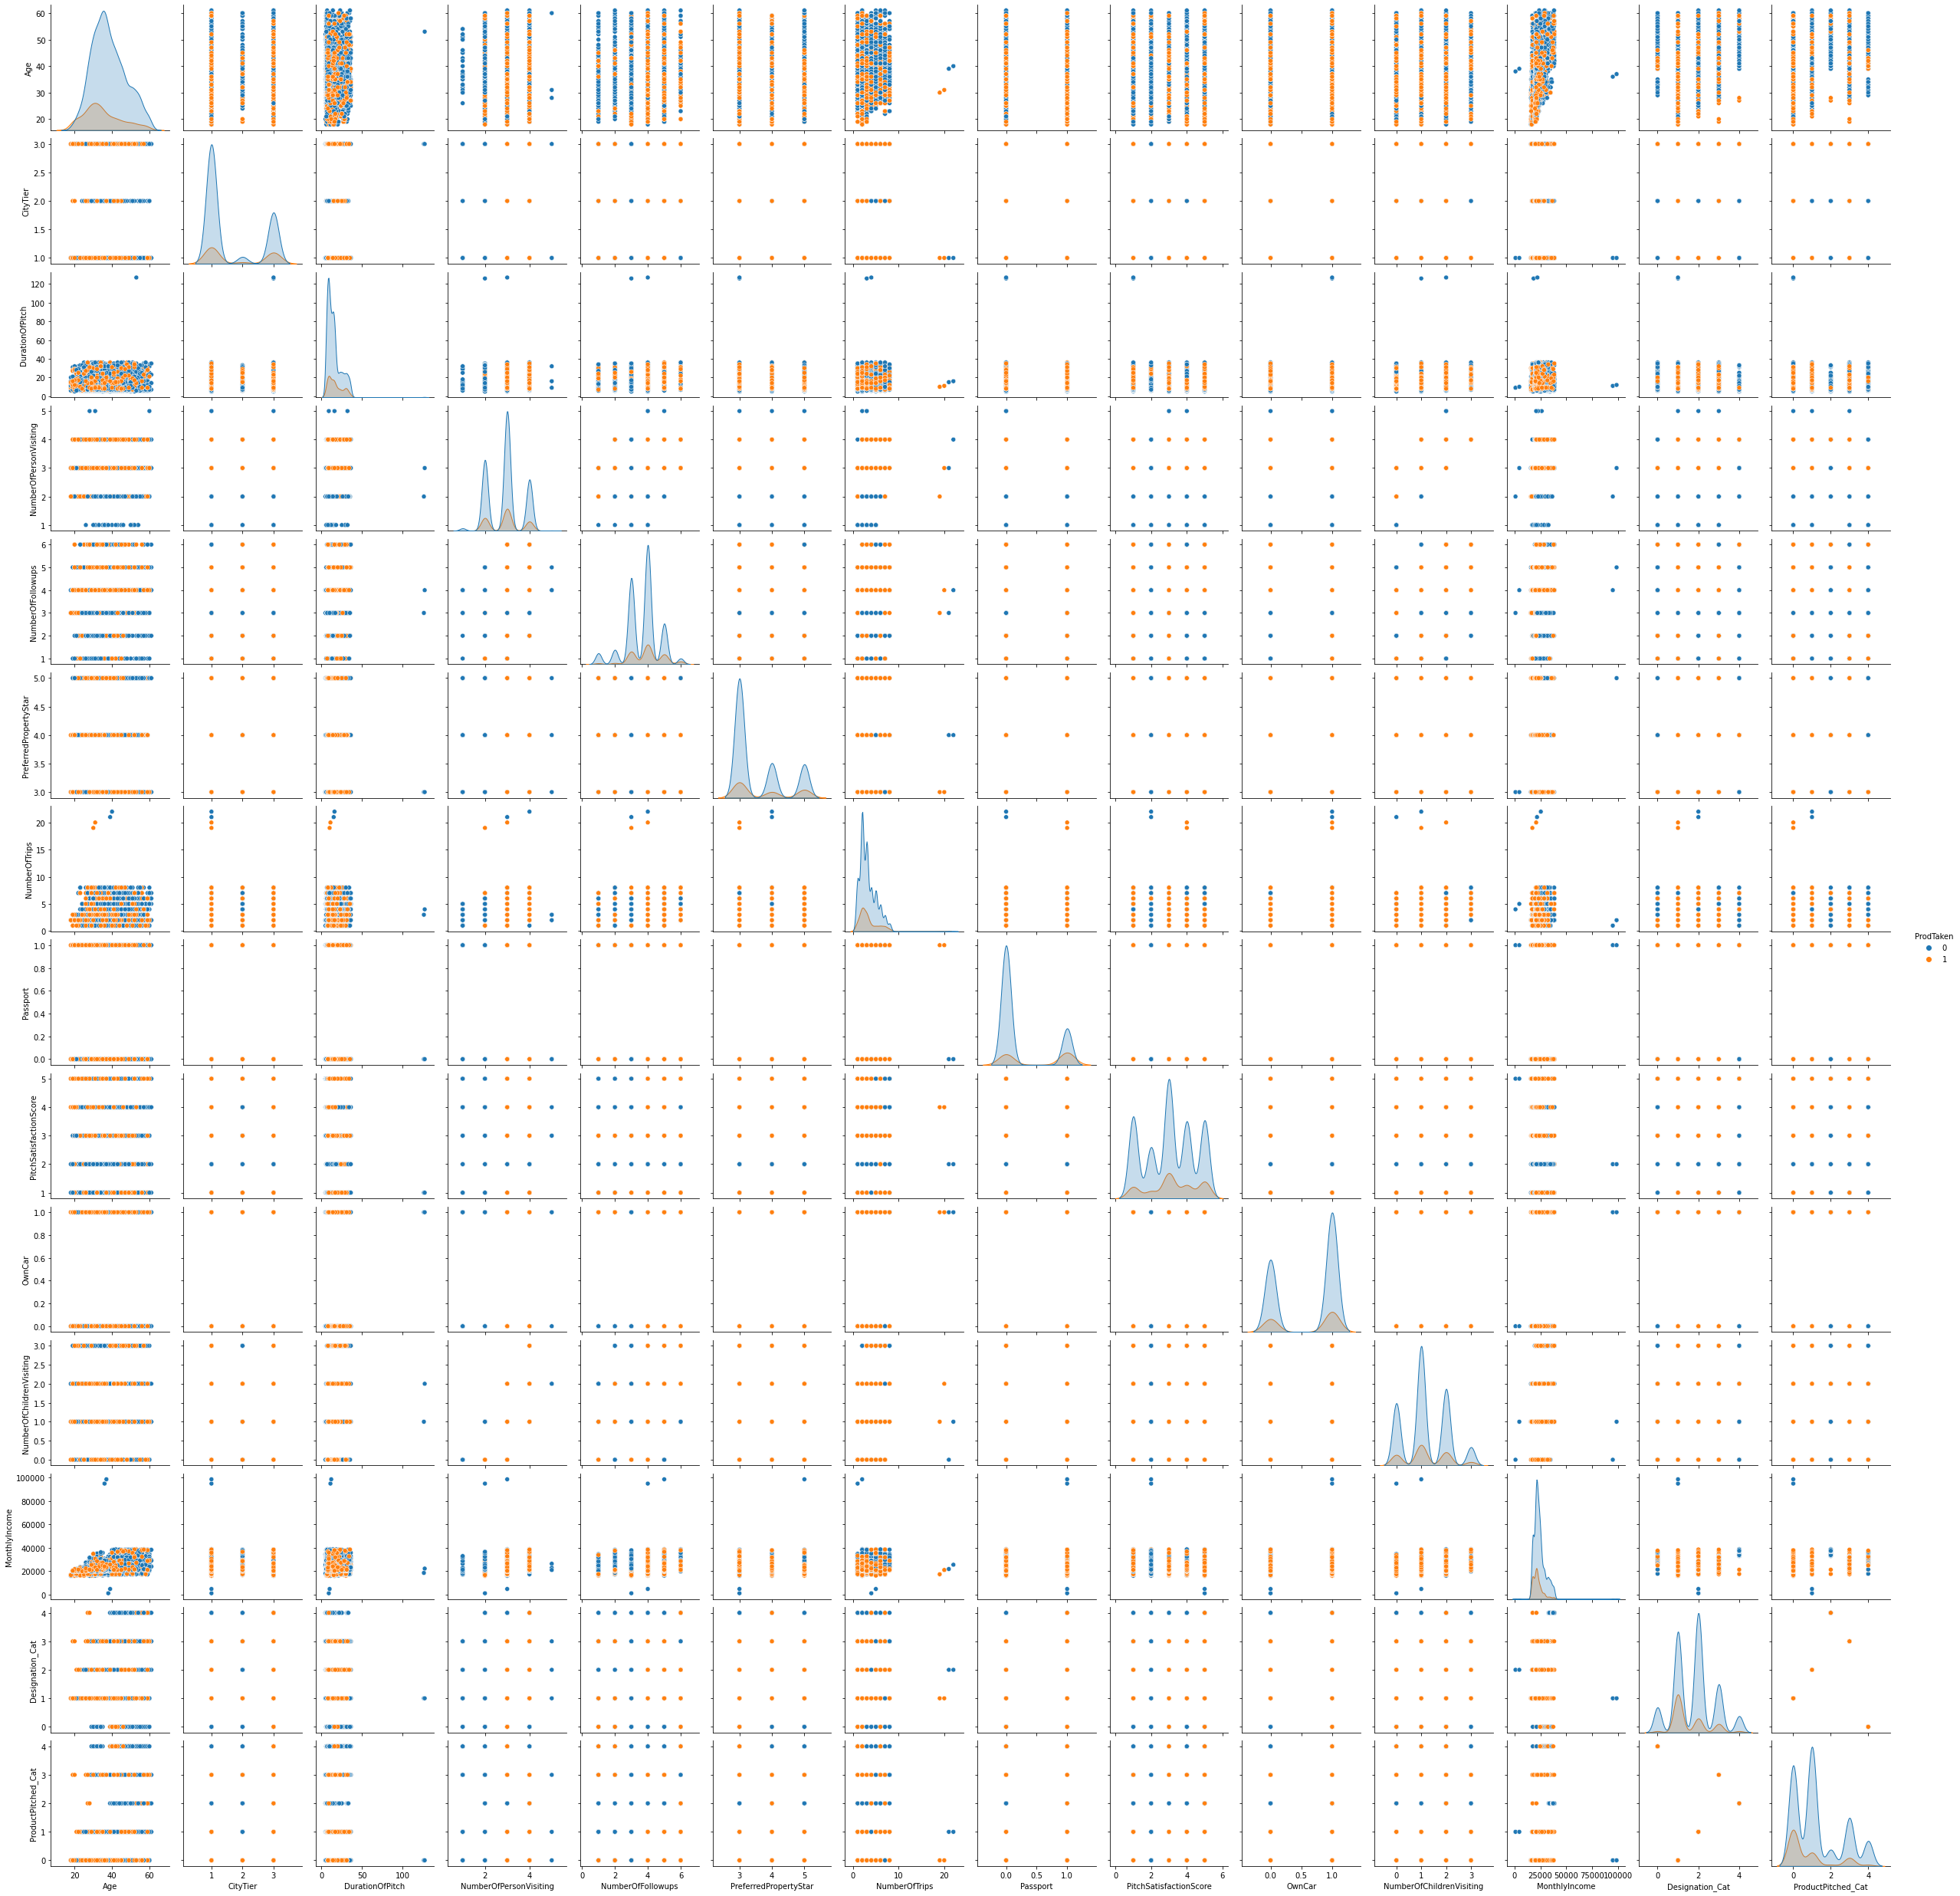

In [16]:
sns.pairplot(df,hue='ProdTaken')
plt.show()


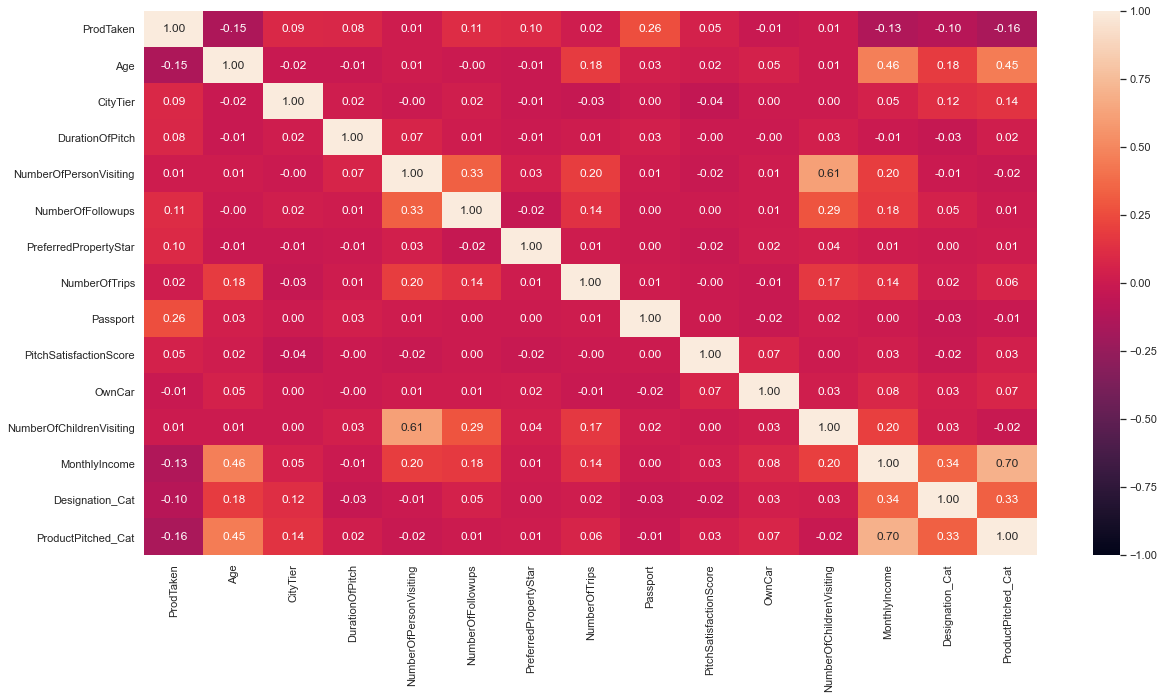

In [237]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

*Observations:*
- Strong correlation between product pitched and monthly income.  This may be due to the some sort of prequalification the agency does before pitching the product to it's customer.
- Slight correlation between Designation and product pitched.  Again could be due to prequalification
- Correlation between owning a passport and the target variable of product taken.  Possible conclusion could be people who have passports are more likley to book vacations or the opposite.  
- Also correlation between product pitched and age.  On possible explainaiton is the correlation between age and monthly income correlating with age as well.
- Correlation as well between number of children visiting with number of perosons visiting.  This could be because of the way the data was collected.  Recomend future data collection to be more specific and change number of persons to number of adults to avoid confusion.  


In [239]:

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

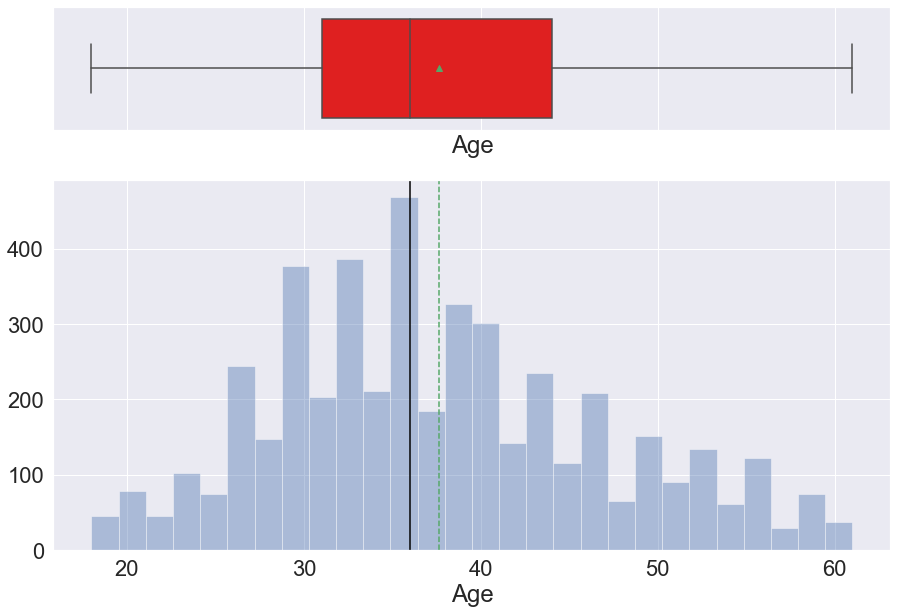

In [240]:
histogram_boxplot(df["Age"])

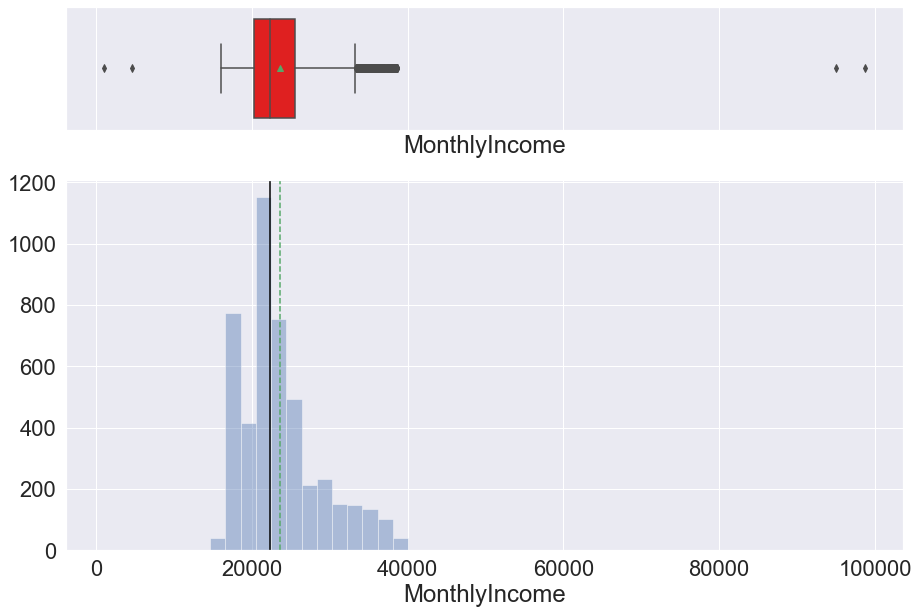

In [241]:
histogram_boxplot(df["MonthlyIncome"])

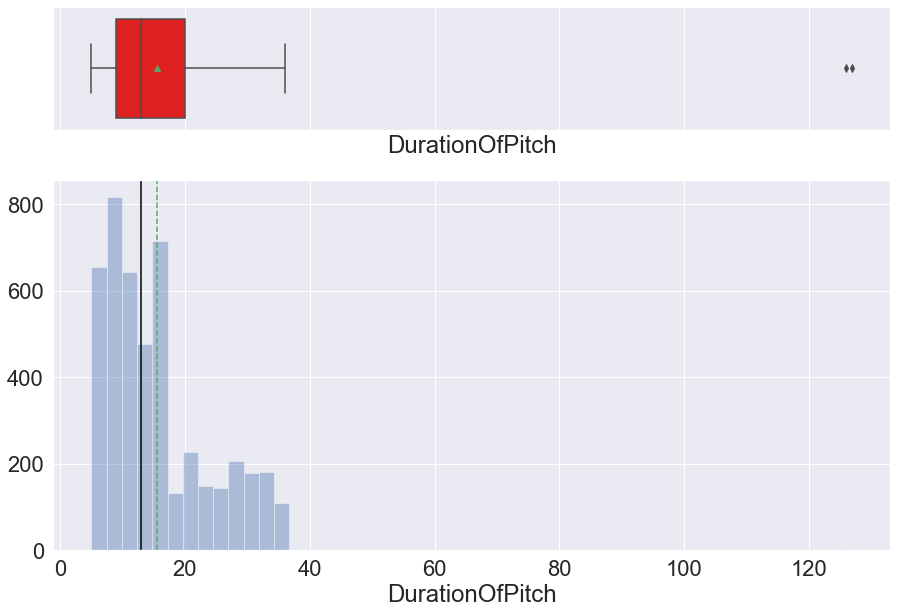

In [242]:
histogram_boxplot(df["DurationOfPitch"])

*Observations*
- both Age and monthly income are normally distributed with montly income but left scewed due to outliers.

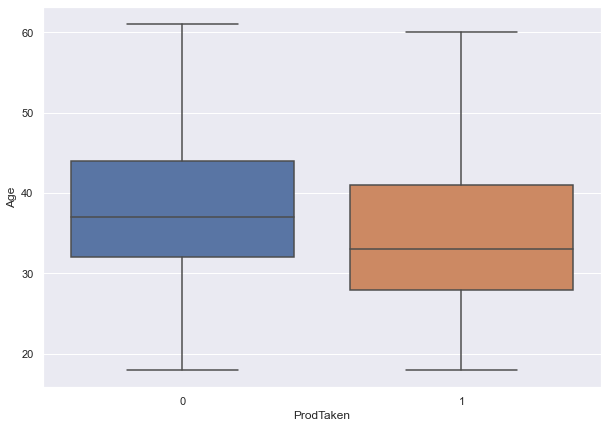

In [243]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="ProdTaken", y="Age", data=df, orient="vertical")
plt.show()

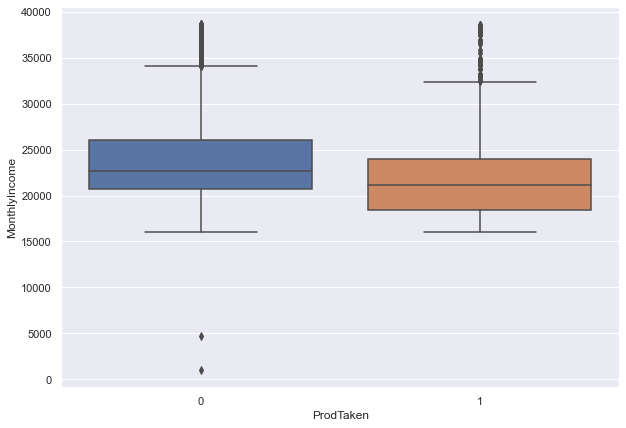

In [244]:

sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="ProdTaken", y="MonthlyIncome", data=df[df["MonthlyIncome"] < 40000], orient="vertical")
plt.show()

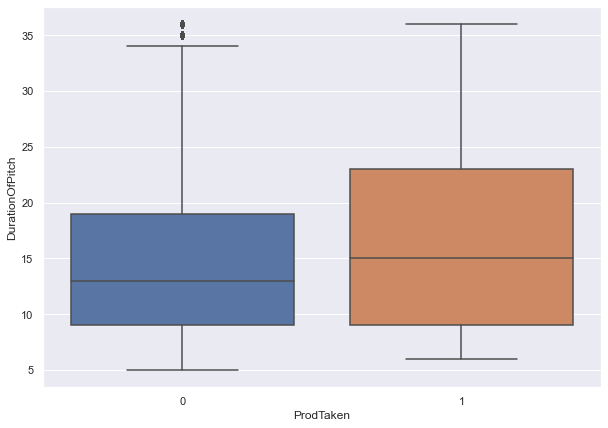

In [245]:
#I filtered out any duration of pitch above 40 to limit the effects of outliers on the visualization
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="ProdTaken", y="DurationOfPitch", data=df[df['DurationOfPitch']<40], orient="vertical")
plt.show()

Observation:   
- A larger segmant of customers who bought the product were younger in age
- A larger segmant of customers were also lower in income.
- longer duration of pitch resulted in more sales.

In [246]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='barh',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [247]:
# Function to create barplots that indicate percentage for each category.
def ms_pc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

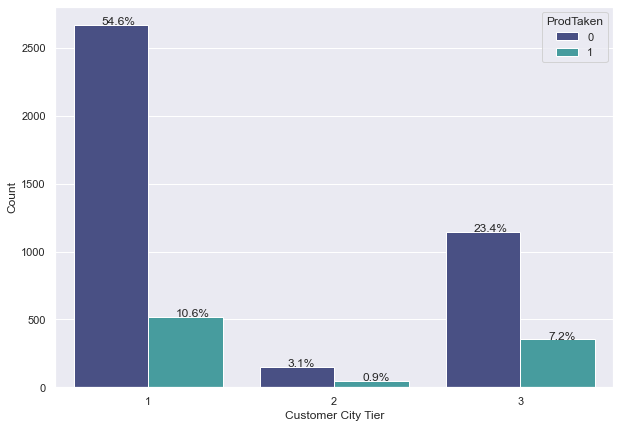

In [248]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['CityTier'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Customer City Tier')
plt.ylabel('Count')
ms_pc(ax,df['ProdTaken'])

*Observation:* Those in a city tier 1 and 3 seem more likey to buy the product.

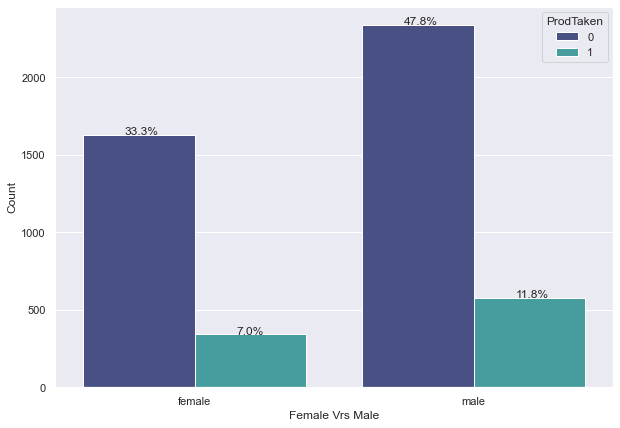

In [249]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Female Vrs Male')
plt.ylabel('Count')
ms_pc(ax,df['ProdTaken'])

A greater portion of males bought the product than females. but there are almost 1000 more males than females in the dataset.

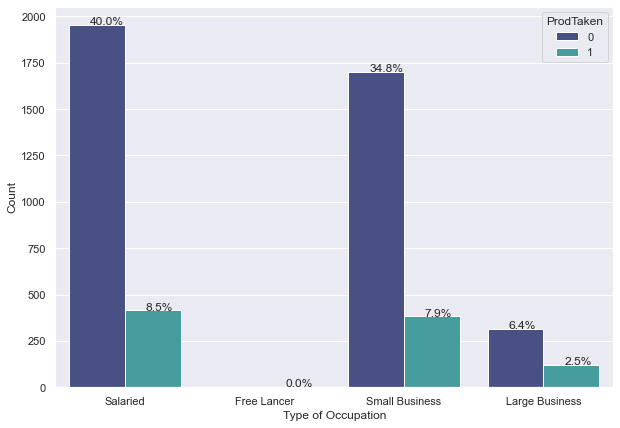

In [250]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Occupation'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Type of Occupation')
plt.ylabel('Count')
ms_pc(ax,df['ProdTaken'])

Salaried and small business make up the majority of occupation types

In [373]:
Salaried follow by small business are a majority of customers who bought products.

SyntaxError: invalid syntax (<ipython-input-373-71a927bee1a4>, line 1)

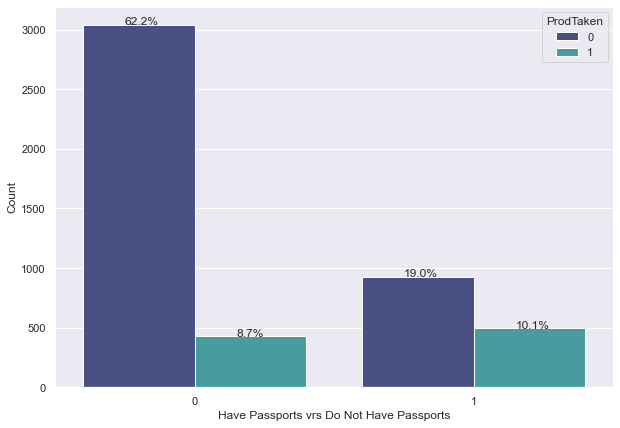

In [251]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Passport'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Have Passports vrs Do Not Have Passports')
plt.ylabel('Count')
ms_pc(ax,df['ProdTaken'])

a vast majority of customers do not have passports, but there are more customers that bought products that do have passports than those that bought products without passports.

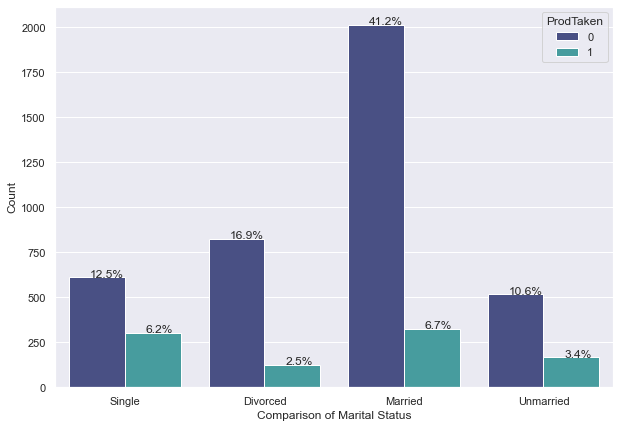

In [252]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Comparison of Marital Status')
plt.ylabel('Count')
ms_pc(ax,df['ProdTaken'])

married customers make a large portion of the data set and those that are married bought slightly more than those that are single.  However almost 50% of all single customers bought products.

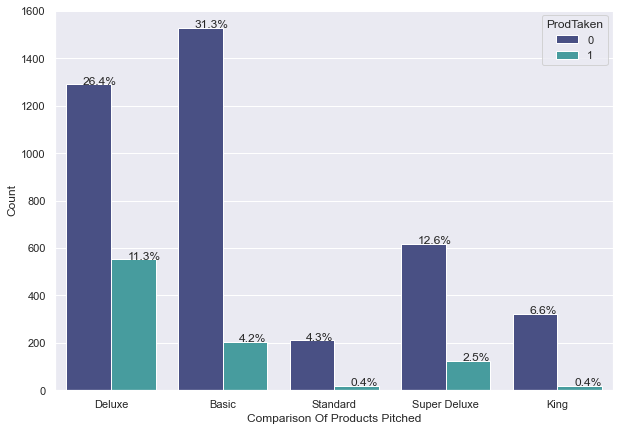

In [253]:
plt.figure(figsize=(10,7))
labels = ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
ax = sns.countplot(df['ProductPitched_Cat'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Comparison Of Products Pitched')
plt.ylabel('Count')
ax.set_xticklabels(labels)
ms_pc(ax,df['ProdTaken'])

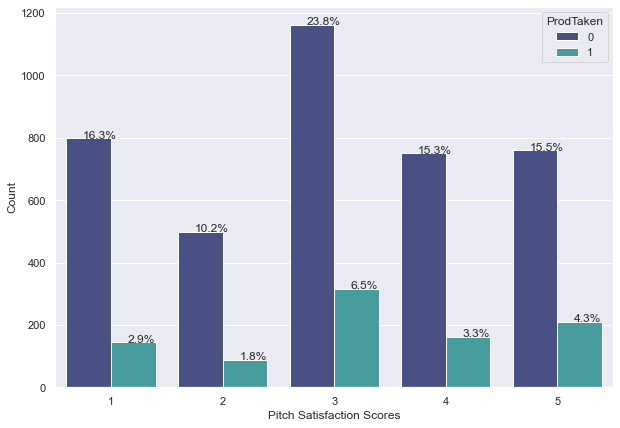

In [254]:
plt.figure(figsize=(10,7))#labels = ['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']
ax = sns.countplot(df['PitchSatisfactionScore'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Pitch Satisfaction Scores')
plt.ylabel('Count')
#ax.set_xticklabels(labels)
ms_pc(ax,df['ProdTaken'])

Majority of pitch satisfaction score is 3 or greater and those scores include the highest amount of sales.

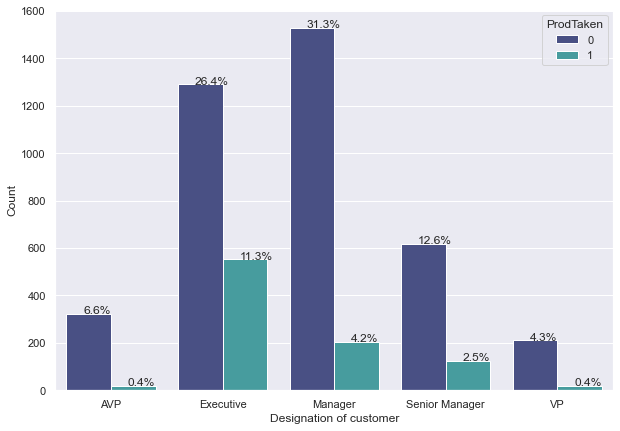

In [255]:
plt.figure(figsize=(10,7))
labels2 = ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
ax = sns.countplot(df['Designation_Cat'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Designation of customer')
plt.ylabel('Count')
ax.set_xticklabels(labels2)
ms_pc(ax,df['ProdTaken'])

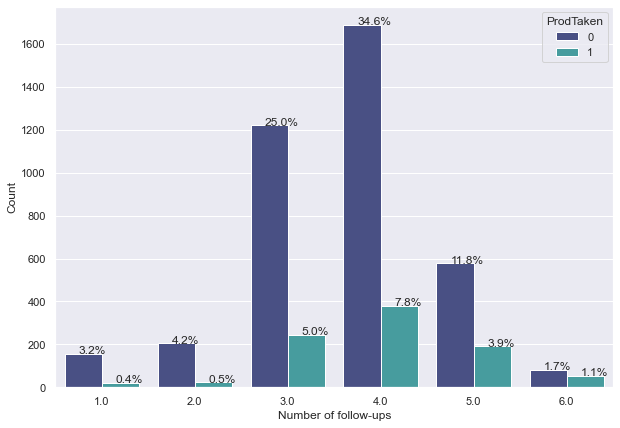

In [256]:
plt.figure(figsize=(10,7))
#labels2 = ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
ax = sns.countplot(df['NumberOfFollowups'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Number of follow-ups')
plt.ylabel('Count')
#ax.set_xticklabels(labels2)
ms_pc(ax,df['ProdTaken'])

There is an increase in sales with number of followups greater than 3

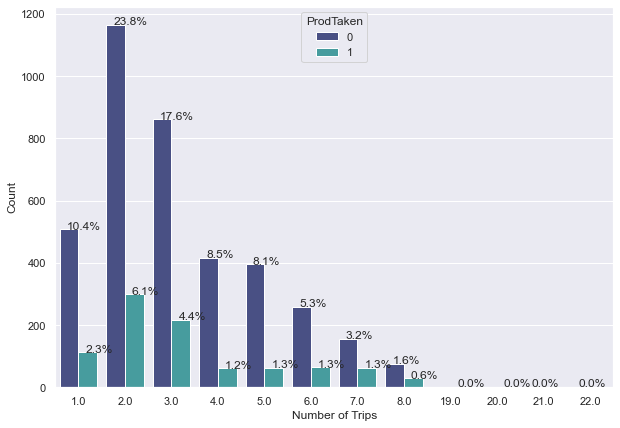

In [257]:
plt.figure(figsize=(10,7))
#labels2 = ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
ax = sns.countplot(df['NumberOfTrips'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Number of Trips')
plt.ylabel('Count')
#ax.set_xticklabels(labels2)
ms_pc(ax,df['ProdTaken'])

A good majority of the customer base has 2 or more trips already.  

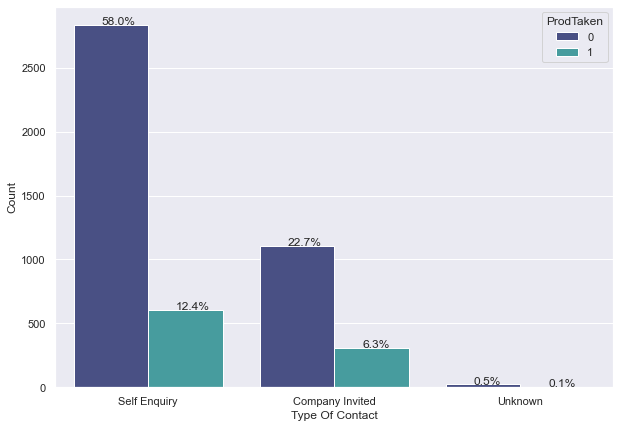

In [258]:
plt.figure(figsize=(10,7))
#labels2 = ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
ax = sns.countplot(df['TypeofContact'], hue=df['ProdTaken'], palette = 'mako')
plt.xlabel('Type Of Contact')
plt.ylabel('Count')
#ax.set_xticklabels(labels2)
ms_pc(ax,df['ProdTaken'])

Most customers are considered self enquiry.

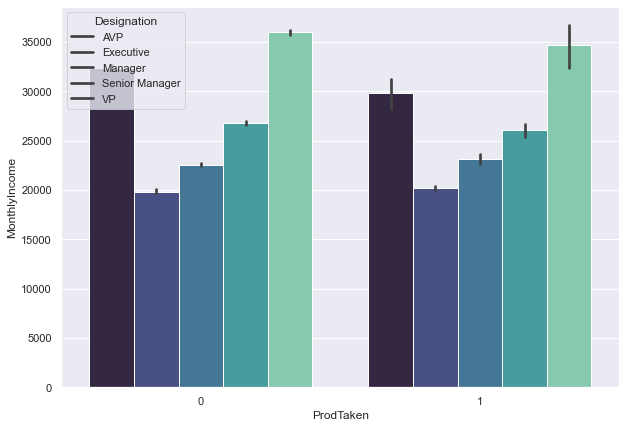

In [259]:
plt.figure(figsize=(10,7))
ax =sns.barplot(x=df['ProdTaken'], y=df['MonthlyIncome'], palette = 'mako',hue=df['Designation_Cat'])
plt.legend(title='Designation', loc='upper left', labels=labels2)

plt.show()

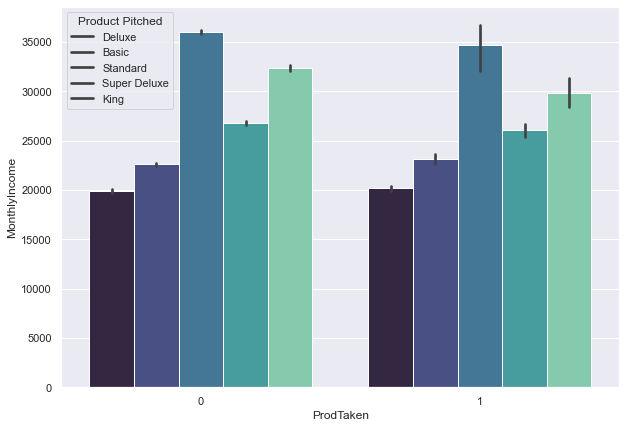

In [260]:
plt.figure(figsize=(10,7))
ax =sns.barplot(x=df['ProdTaken'], y=df['MonthlyIncome'], palette = 'mako', hue=df['ProductPitched_Cat'] )
plt.legend(title='Product Pitched', loc='upper left', labels=labels)
plt.show()

# <a id='link4'>Missing Value and Outlier Treatment</a>
 <a href ='#btt'>back to top</a>

In [8]:
df1 = df.copy()

In [9]:
#Function for treating Outliers
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

In [10]:
#Treating Outliers in the following Colunmns
treat_outliers(df1, 'MonthlyIncome')
treat_outliers(df1, 'DurationOfPitch')

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Designation_Cat,ProductPitched_Cat
0,1,41.0,Self Enquiry,3,6.0,Salaried,female,3,3.0,3.0,Single,1.0,1,2,1,0.0,20993.0,2,1
1,0,49.0,Company Invited,1,14.0,Salaried,male,3,4.0,4.0,Divorced,2.0,0,3,1,2.0,20130.0,2,1
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,male,3,4.0,3.0,Single,7.0,1,3,0,0.0,17090.0,1,0
3,0,33.0,Company Invited,1,9.0,Salaried,female,2,3.0,3.0,Divorced,2.0,1,5,1,1.0,17909.0,1,0
4,0,NaN,Self Enquiry,1,8.0,Small Business,male,2,3.0,4.0,Divorced,1.0,0,5,1,0.0,18468.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,male,3,5.0,4.0,Unmarried,2.0,1,1,1,1.0,26576.0,2,1
4884,1,28.0,Company Invited,1,31.0,Salaried,male,4,5.0,3.0,Single,3.0,1,3,1,2.0,21212.0,1,0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,female,4,4.0,4.0,Married,7.0,0,1,1,3.0,31820.0,3,3
4886,1,19.0,Self Enquiry,3,16.0,Small Business,male,3,4.0,3.0,Single,3.0,0,5,0,2.0,20289.0,1,0


### Missing Value treatment

In [11]:
#I am filling all the numerical values with the mean of the column.
#The ones that are essentally binary catagories are being filled with the mode.
df1['Age'] = df1['Age'].fillna(df1['Age'].mean()) 
df1['DurationOfPitch'] = df1['DurationOfPitch'].fillna(df1['DurationOfPitch'].mean()) 
df1['NumberOfFollowups'] = df1['NumberOfFollowups'].fillna(df1['NumberOfFollowups'].mode()[0]) 
df1['PreferredPropertyStar'] = df1['PreferredPropertyStar'].fillna(df1['PreferredPropertyStar'].mode()[0])
df1['NumberOfTrips'] = df1['NumberOfTrips'].fillna(df1['NumberOfTrips'].mode()[0]) 
df1['NumberOfChildrenVisiting'] = df1['NumberOfChildrenVisiting'].fillna(df1['NumberOfChildrenVisiting'].mode()[0])
df1['MonthlyIncome'] = df1['MonthlyIncome'].fillna(df1['MonthlyIncome'].mean())


In [305]:
df1.isnull().sum().sort_values(ascending=False)

ProductPitched_Cat          0
NumberOfFollowups           0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
Designation_Cat             0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

# <a id='link5'>Data Preparation for Modeling</a>
 <a href ='#btt'>back to top</a>

In [12]:
#before I start preparing for Modeling I like to create a new data frame.  If I have to start over I want to start from 
#here and not the begining of the notebook
df2 = df1.copy()

In [13]:
#one hot encoding for the following columns
df2 = pd.get_dummies(df2, columns=["TypeofContact", "Occupation",'MaritalStatus', 'Gender'])

print(df2.columns)


Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Designation_Cat',
       'ProductPitched_Cat', 'TypeofContact_Company Invited',
       'TypeofContact_Self Enquiry', 'TypeofContact_Unknown',
       'Occupation_Free Lancer', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Gender_female',
       'Gender_male'],
      dtype='object')


In [308]:
np.random.seed(1)
df2.sample(n=10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Designation_Cat,ProductPitched_Cat,TypeofContact_Company Invited,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Gender_female,Gender_male
3015,0,27.0,1,7.0,4,6.0,3.0,5.0,0,4,1,3.0,23042.0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1242,0,40.0,3,13.0,2,3.0,4.0,2.0,0,4,1,1.0,33408.5,4,2,0,1,0,0,0,0,1,0,0,1,0,0,1
3073,0,29.0,2,15.0,4,5.0,3.0,3.0,0,2,0,2.0,23614.0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
804,0,48.0,1,6.0,2,1.0,3.0,3.0,0,2,0,0.0,31885.0,0,4,1,0,0,0,0,0,1,0,0,1,0,0,1
3339,0,32.0,1,18.0,4,4.0,5.0,3.0,1,2,0,3.0,25511.0,2,1,0,1,0,0,0,0,1,1,0,0,0,0,1
3080,1,36.0,1,32.0,4,4.0,4.0,3.0,1,3,0,1.0,20700.0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2851,0,46.0,1,17.0,4,4.0,3.0,5.0,0,5,1,1.0,21332.0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2883,1,32.0,1,27.0,4,4.0,3.0,5.0,0,3,1,1.0,28502.0,3,3,1,0,0,0,0,1,0,1,0,0,0,0,1
1676,0,22.0,1,11.0,2,1.0,4.0,2.0,1,4,1,0.0,17328.0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
1140,0,44.0,1,13.0,2,3.0,3.0,1.0,1,4,1,1.0,33408.5,4,2,0,1,0,0,0,0,1,0,1,0,0,1,0


In [14]:
#Designate the target variable
X = df2.drop("ProdTaken" , axis=1)
y = df2.pop("ProdTaken")

In [310]:
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,Designation_Cat,ProductPitched_Cat,TypeofContact_Company Invited,TypeofContact_Self Enquiry,TypeofContact_Unknown,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Gender_female,Gender_male
0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0,2,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1
2,37.000000,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
3,33.000000,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,37.622265,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [16]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [20]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 scor of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# <a id='link6'>Data Modeling</a>

Since the overall object of this model is to maket to customers in an efficient mannor emphasis will be placed on precision.  However, recall cannot be completley ignored as an extremely precise model may miss too many customers.  

### <a id='linkba'>Bagging Classifier</a>
 <a href ='#btt'>back to top</a>

In [24]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [25]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9932768196433791
Accuracy on test set :  0.9032038173142468
Recall on training set :  0.9658385093167702
Recall on test set :  0.5942028985507246
Precision on training set :  0.9983948635634029
Precision on test set :  0.845360824742268
F1 on training set :  0.9818468823993686
F1 on test set :  0.6978723404255318


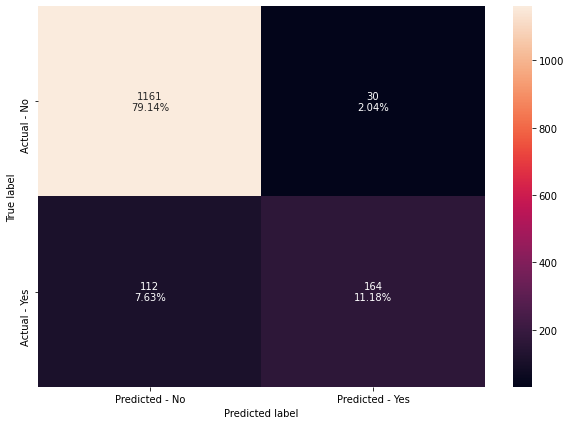

In [26]:
make_confusion_matrix(bagging_estimator,y_test)

*Observations:* This model is overfitting slightly on precsion and the recall is terrible.  

Bagging Improvement

In [27]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [28]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9141104294478528
Recall on training set :  0.9968944099378882
Recall on test set :  0.6086956521739131
Precision on training set :  1.0
Precision on test set :  0.9032258064516129
F1 on training set :  0.9984447900466563
F1 on test set :  0.7272727272727272


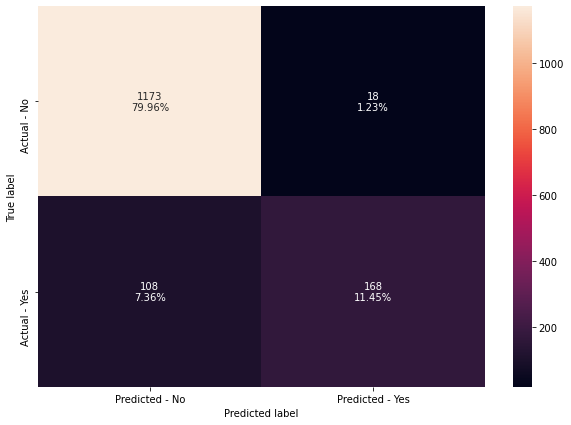

In [29]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

*Observations:* The precision is slightly improved but recall still sufferes from overfitting.

In [30]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.3,1:0.7},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        random_state=1),
                  random_state=1)

In [31]:
bagging_estimator_score=get_metrics_score(bagging_wt)

Accuracy on training set :  0.9938614440222158
Accuracy on test set :  0.9066121336059987
Recall on training set :  0.968944099378882
Recall on test set :  0.572463768115942
Precision on training set :  0.9984
Precision on test set :  0.8926553672316384
F1 on training set :  0.983451536643026
F1 on test set :  0.6975717439293598


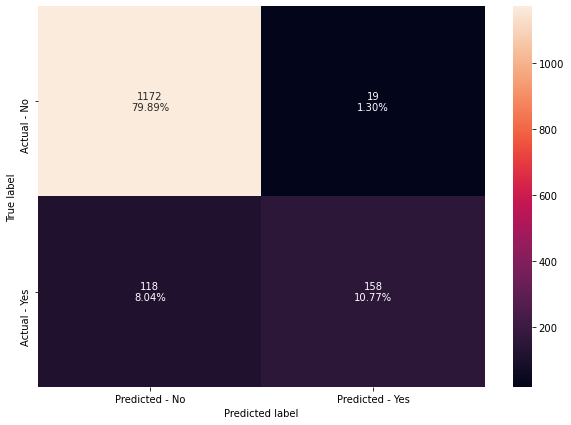

In [32]:
make_confusion_matrix(bagging_wt,y_test)

*Observations:* Precision has suffered slighly and recall is about the same as the previous model.

### <a id='linkrf'>Random Forrest</a>
 <a href ='#btt'>back to top</a>

In [33]:
#Train the random forest classifier
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [34]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9154737559645535
Recall on training set :  1.0
Recall on test set :  0.5833333333333334
Precision on training set :  1.0
Precision on test set :  0.9470588235294117
F1 on training set :  1.0
F1 on test set :  0.7219730941704037


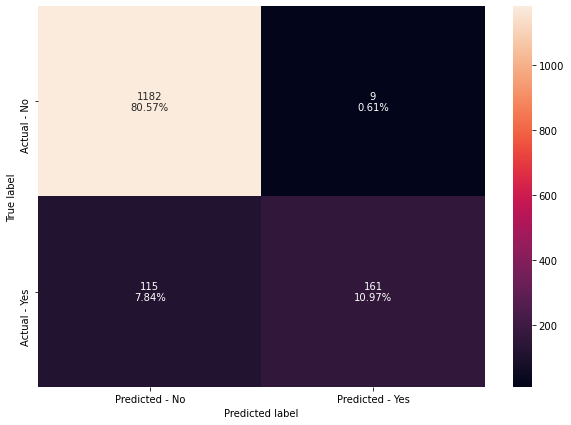

In [35]:
make_confusion_matrix(rf,y_test)

*Observations:* Random Forrest shows about the same results as bagging.  Precision is good but recall is overfitting thus the model would minimize the amount of false positives (customers predicted to buy the product but said no) and would miss a significant amount of False negatives. (customers would would have bought the product and but were predicted not to)

**Random forest with class weights**

In [36]:
rf_wt = RandomForestClassifier(class_weight={0:0.3,1:0.7}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [37]:
rf_wt_score=get_metrics_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9154737559645535
Recall on training set :  1.0
Recall on test set :  0.5760869565217391
Precision on training set :  1.0
Precision on test set :  0.9578313253012049
F1 on training set :  1.0
F1 on test set :  0.7194570135746606


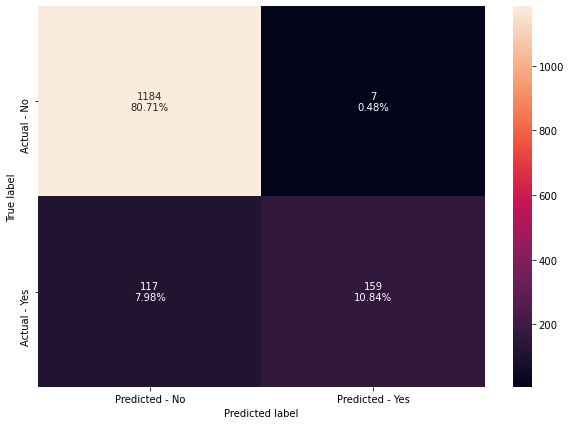

In [38]:
make_confusion_matrix(rf_wt,y_test)

*Observations:* Randome Forrest with class weights did not improve the model significantly.

**Random Forrest Improvement**

In [39]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250,300],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth": [5, 10, 15, 20],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [40]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9058754750073078
Accuracy on test set :  0.8725289706884799
Recall on training set :  0.5279503105590062
Recall on test set :  0.40942028985507245
Precision on training set :  0.9497206703910615
Precision on test set :  0.8248175182481752
F1 on training set :  0.6786427145708582
F1 on test set :  0.5472154963680387


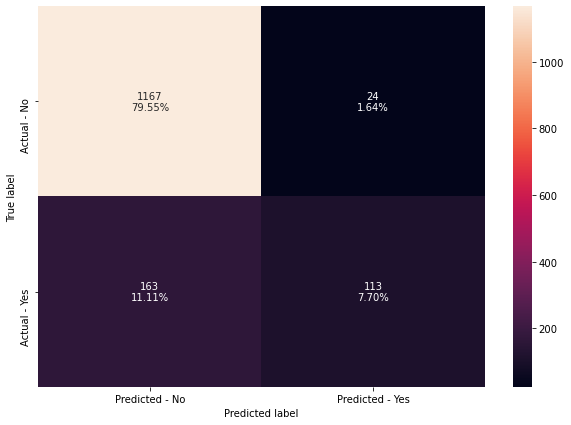

In [41]:
make_confusion_matrix(rf_estimator_tuned,y_test)

*Observations:* Even tuning random forrest has not produced significanly better results.

### <a id='linkdt'>Decision Tree</a>
 <a href ='#btt'>back to top</a>

In [42]:
dtmodel = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
dtmodel_score = get_metrics_score (dtmodel)

Accuracy on training set :  1.0
Accuracy on test set :  0.8766189502385822
Recall on training set :  1.0
Recall on test set :  0.6521739130434783
Precision on training set :  1.0
Precision on test set :  0.6792452830188679
F1 on training set :  1.0
F1 on test set :  0.6654343807763401


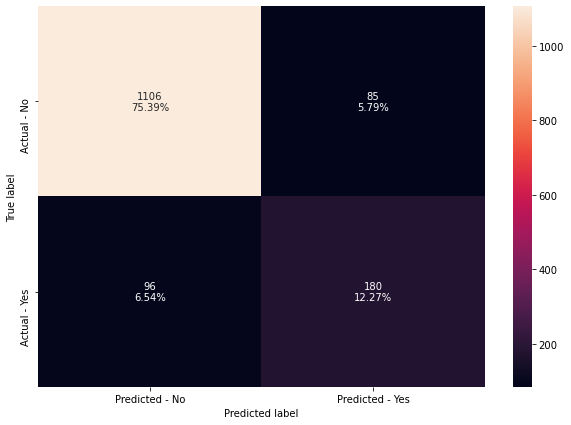

In [44]:
make_confusion_matrix(dtmodel,y_test)

*Observations:*  Decision tree by itself produced more false postives with less false negatvies but precision and recall are both equally poor and overfitting.

**Decision Tree Improvement**

In [46]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.3,1:0.7},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [25, 30, 35, 40, 45 ],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=2,
                       max_leaf_nodes=25, min_impurity_decrease=0.01,
                       random_state=1)

In [47]:
dtmodel__estimator_score = get_metrics_score (dtree_estimator)

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043
Precision on training set :  0.5405405405405406
Precision on test set :  0.6335403726708074
F1 on training set :  0.4186489058039962
F1 on test set :  0.4668192219679634


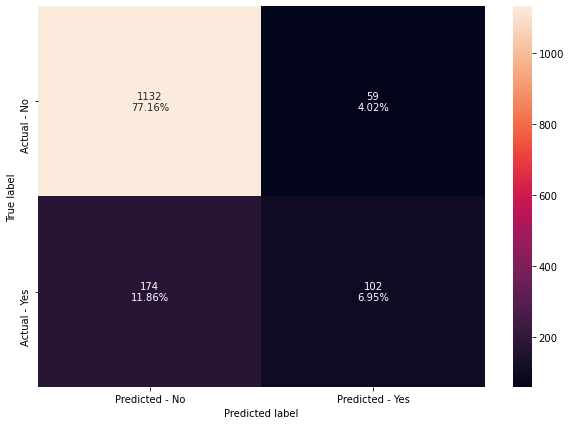

In [48]:
make_confusion_matrix(dtree_estimator,y_test)

*Observation:* this model is not an improvment.

In [49]:
# defining list of models
models = [bagging_estimator
            ,bagging_wt
            ,rf
            ,rf_wt
            ,dtmodel
            ,bagging_estimator_tuned
            ,rf_estimator_tuned
            ,dtree_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
#f1_train = []
#f1_test = []

# looping through all the models to get the accuracy, recall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    #f1_train.append(np.round(j[6],2))
    #f1_test.append(np.round(j[7],2))

In [50]:
models = [bagging_estimator
            ,bagging_wt
            ,rf
            ,rf_wt
            ,dtmodel
            ,bagging_estimator_tuned
            ,rf_estimator_tuned
            ,dtree_estimator]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [51]:
comparison_frame = pd.DataFrame({'Model':["bagging_estimator"
            ,"bagging_wt"
            ,"rf"
            ,"rf_wt"
            ,"dtmodel"
            ,"bagging_estimator_tuned"
            ,"rf_estimator_tuned"
            ,"dtree_estimator"], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
0,bagging_estimator,0.993277,0.903204,0.965839,0.594203,0.998395,0.845361,0.981847,0.697872
1,bagging_wt,0.993861,0.906612,0.968944,0.572464,0.998400,0.892655,0.983452,0.697572
2,rf,1.000000,0.915474,1.000000,0.583333,1.000000,0.947059,1.000000,0.721973
3,rf_wt,1.000000,0.915474,1.000000,0.576087,1.000000,0.957831,1.000000,0.719457
4,dtmodel,1.000000,0.876619,1.000000,0.652174,1.000000,0.679245,1.000000,0.665434
5,bagging_estimator_tuned,0.999415,0.914110,0.996894,0.608696,1.000000,0.903226,0.998445,0.727273
6,rf_estimator_tuned,0.905875,0.872529,0.527950,0.409420,0.949721,0.824818,0.678643,0.547215
7,dtree_estimator,0.821397,0.841172,0.341615,0.369565,0.540541,0.633540,0.418649,0.466819


*Observation:* of all the models tested wieghted random forrest seems to have the best precision scores but the recall still suffers.  Decision tree appears to have the best balance but the results are still not great.  Lets see how our dataset performs under boosting models.

### <a id='linkada'>Boosting -ADAboost</a>
 <a href ='#btt'>back to top</a>

In [52]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [53]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8447822274188833
Accuracy on test set :  0.841854124062713
Recall on training set :  0.32919254658385094
Recall on test set :  0.30434782608695654
Precision on training set :  0.6816720257234726
Precision on test set :  0.6774193548387096
F1 on training set :  0.4439790575916231
F1 on test set :  0.42


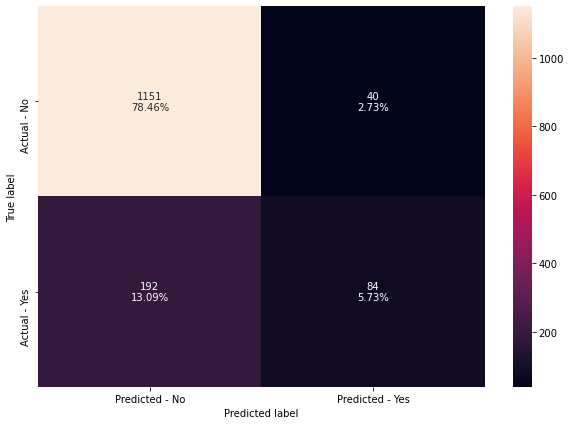

In [54]:
make_confusion_matrix(abc,y_test)

*Observation:*  Adaboost suffers from underfititng by its scores.  Lets see if tuning can improve it's performance.

**Adaboost Improvement**

In [55]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

In [56]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9912306343174511
Accuracy on test set :  0.8888888888888888
Recall on training set :  0.9642857142857143
Recall on test set :  0.6521739130434783
Precision on training set :  0.9888535031847133
Precision on test set :  0.728744939271255
F1 on training set :  0.9764150943396226
F1 on test set :  0.6883365200764818


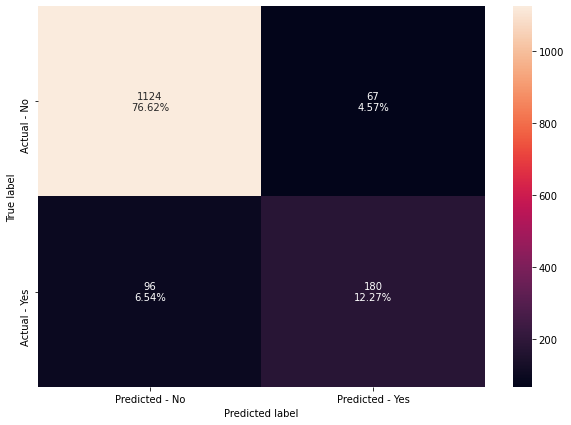

In [57]:
make_confusion_matrix(abc_tuned,y_test)

Tuning has improved the models performance but it is still overfitting. 

### <a id='linkgb'>Gradient Boosting</a>
 <a href ='#btt'>back to top</a>

In [58]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [59]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8857059339374452
Accuracy on test set :  0.869120654396728
Recall on training set :  0.453416149068323
Recall on test set :  0.40942028985507245
Precision on training set :  0.8821752265861027
Precision on test set :  0.795774647887324
F1 on training set :  0.598974358974359
F1 on test set :  0.5406698564593302


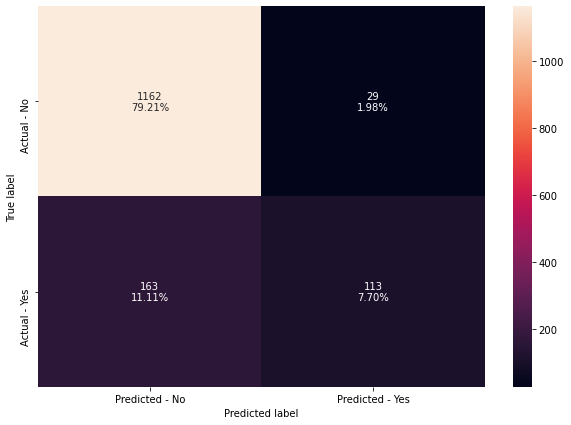

In [60]:
make_confusion_matrix(gbc,y_test)

*Observation:* Gradient boost sufferes the same problem as adaboost.  Again lets tune it to see if we can improve performance.

**Gradient Boost Improvement**

In [61]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [62]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8857059339374452
Accuracy on test set :  0.869120654396728
Recall on training set :  0.453416149068323
Recall on test set :  0.40942028985507245
Precision on training set :  0.8821752265861027
Precision on test set :  0.795774647887324
F1 on training set :  0.598974358974359
F1 on test set :  0.5406698564593302


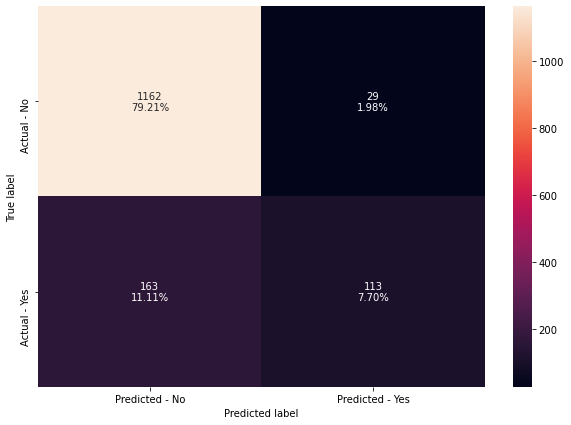

In [63]:
make_confusion_matrix(gbc,y_test)

While there is a marked improvement on precision the recall still suffers.  

### <a id='linkada'>XGBoost</a>
 <a href ='#btt'>back to top</a>

In [64]:
xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [65]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9202453987730062
Recall on training set :  0.9984472049689441
Recall on test set :  0.6702898550724637
Precision on training set :  1.0
Precision on test set :  0.8767772511848341
F1 on training set :  0.9992229992229993
F1 on test set :  0.7597535934291582


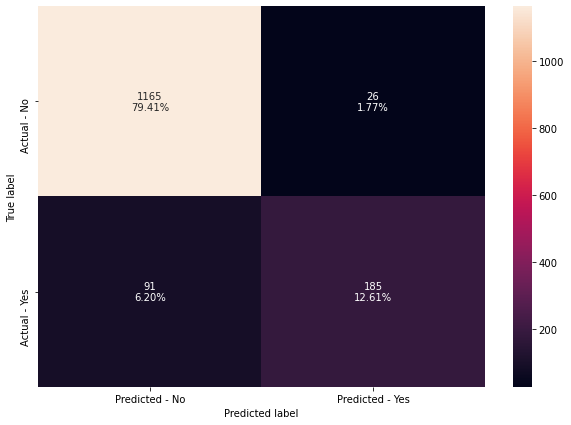

In [66]:
make_confusion_matrix(xgb,y_test)

*Obeservation:* So far these are some of the best results.  While not perfect they are on the right track.

XGBoost Imrpovement

In [67]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [68]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9921075708857059
Accuracy on test set :  0.923653715064758
Recall on training set :  0.9984472049689441
Recall on test set :  0.8369565217391305
Precision on training set :  0.9611360239162929
Precision on test set :  0.7751677852348994
F1 on training set :  0.9794364051789793
F1 on test set :  0.8048780487804879


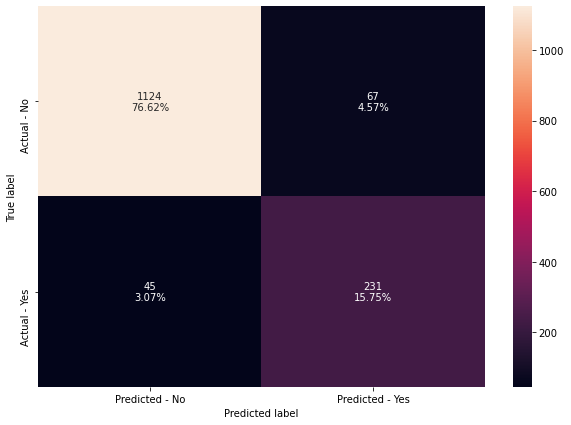

In [69]:
make_confusion_matrix(xgb_tuned,y_test)

### <a id='linkst'>Stacking Classifier</a>
 <a href ='#btt'>back to top</a>

In [70]:
estimators=[('Decision Tree', dtree_estimator)
            ,('Random Forest', rf_estimator_tuned)
            ,('Bagging estimator Tuned',bagging_estimator_tuned)
           ,('Gradient Boosting', gbc_tuned)
            ,("abc_tuned", abc_tuned )
            ,("gbc_tuned",gbc_tuned)
            ,("Gradient Boost Tuned",xgb_tuned )]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

In [71]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_depth=2,
                                                       max_leaf_nodes=25,
                                                       min_impurity_decrease=0.01,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=15,
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=200,
                                

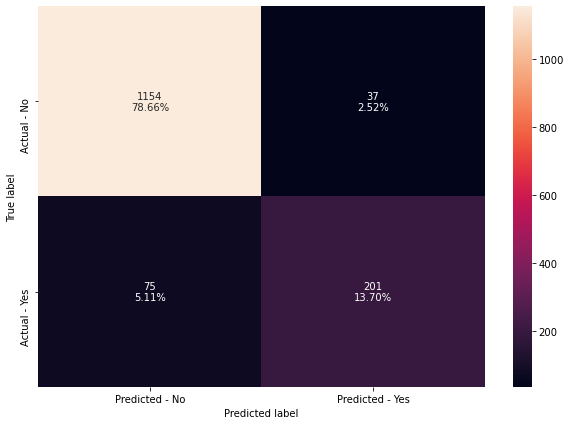

In [72]:
make_confusion_matrix(stacking_estimator,y_test)

In [73]:
stacking_classifier=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.923653715064758
Recall on training set :  1.0
Recall on test set :  0.7282608695652174
Precision on training set :  0.9953632148377125
Precision on test set :  0.8445378151260504
F1 on training set :  0.9976762199845082
F1 on test set :  0.7821011673151752


In [74]:
# defining list of models
models = [bagging_estimator
            ,bagging_wt
            ,rf
            ,rf_wt
            ,dtmodel
            ,bagging_estimator_tuned
            ,rf_estimator_tuned
            ,dtree_estimator
            ,abc
            ,abc_tuned
            ,gbc
            ,gbc_tuned
            ,xgb
            ,xgb_tuned
            ,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(j[6])
    f1_test.append(j[7])

In [75]:
comparison_frame = pd.DataFrame({'Model':["bagging_estimator"
            ,"bagging_wt"
            ,"rf"
            ,"rf_wt"
            ,"dtmodel"
            ,"bagging_estimator_tuned"
            ,"rf_estimator_tuned"
            ,"dtree_estimator","abc"
            ,"abc_tuned"
            ,"gbc"
            ,"gbc_tuned"
            ,"xgb"
            ,"xgb_tuned"
            ,"stacking_estimator"], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1-Score':f1_train, 
                                          'Test_F1-Score':f1_test,
                                }) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
0,bagging_estimator,0.99,0.90,0.97,0.59,1.00,0.85,0.981847,0.697872
1,bagging_wt,0.99,0.91,0.97,0.57,1.00,0.89,0.983452,0.697572
2,rf,1.00,0.92,1.00,0.58,1.00,0.95,1.000000,0.721973
3,rf_wt,1.00,0.92,1.00,0.58,1.00,0.96,1.000000,0.719457
4,dtmodel,1.00,0.88,1.00,0.65,1.00,0.68,1.000000,0.665434
5,bagging_estimator_tuned,1.00,0.91,1.00,0.61,1.00,0.90,0.998445,0.727273
6,rf_estimator_tuned,0.91,0.87,0.53,0.41,0.95,0.82,0.678643,0.547215
7,dtree_estimator,0.82,0.84,0.34,0.37,0.54,0.63,0.418649,0.466819
8,abc,0.84,0.84,0.33,0.30,0.68,0.68,0.443979,0.420000
9,abc_tuned,0.99,0.89,0.96,0.65,0.99,0.73,0.976415,0.688337


## Feature Importance
since feature importance cannot be run on a stacking clasifier I will run it on a comparable/next best model.

In [76]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'Designation_Cat', 'ProductPitched_Cat', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'TypeofContact_Unknown', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Gender_female', 'Gender_male']


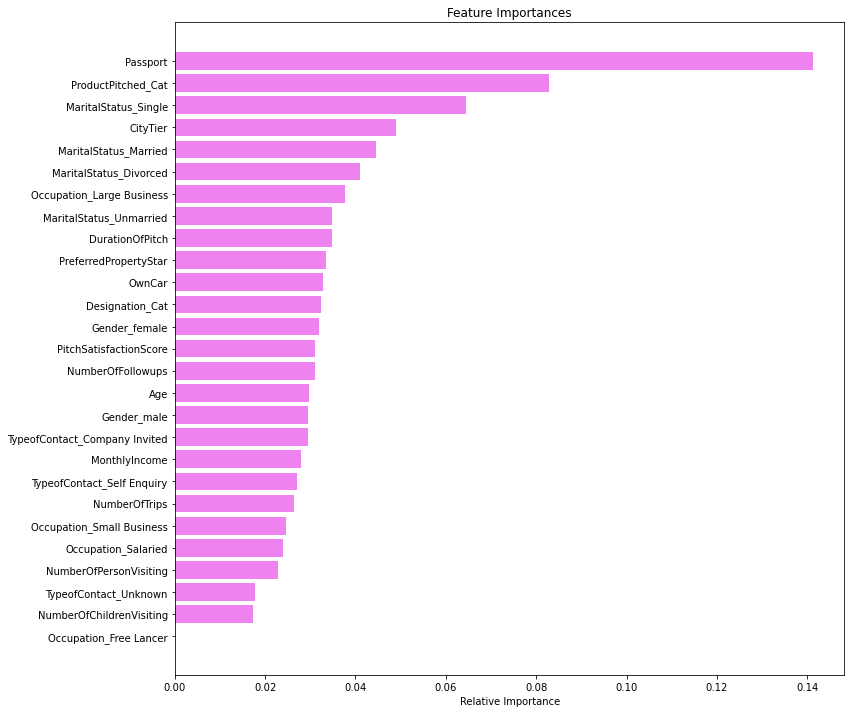

In [79]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# <a id='link7'>Conclusions</a>
 <a href ='#btt'>back to top</a>

Stacking Classifier had the best results over all.  While still overfitting the results were the most balanced. Running feature importance on the next best model reveals that having a passport was the most important featurs.  During EDA it was noticed that over half of customers with passports purchased the product.  The second most important feature was Product pitched.  The basic product was pitched more than deluxe but deluxe had higher sales.  

A cost function analysis can be performed on the better performing models to determin which one would be more useful.  For example, while precision was the metric used to judge the model performance based on the requirement to efficiently target customers (IE reduce marketing costs), it's not the only metric that matters.  Recall on most models was extremly poor and could result in missed oppurtunities for sales.  Therefore it is important to guage costs vrs potential sales and find which balance fits best.

For example, stacking estimator had 35 false positives and 75 false negatives.  If the cost of targeting customers is less than the potental profit of missing customers than the model is good fit.  Being TOO efficient runs the risk of missing potental customers and not being efficient enough means less profits at the expense of marketing costs.  